In [71]:
import pandas as pd
import numpy as np
import ast
from itertools import combinations

import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

### yes questions

In [72]:
df_with_features_h = pd.read_csv('df_with_features_h.csv')
df_with_features_g = pd.read_csv('df_with_features_g.csv')

In [73]:
df_with_features_h

,Unnamed: 0,TRIAL_INDEX,participant_id,EYE_REPORTED,EYE_TRACKED,GROUPING_VARIABLES,IA_AREA,IA_AVERAGE_FIX_PUPIL_SIZE,IA_BOTTOM,IA_DWELL_TIME,...,simpl_fix_by_label,simpl_fix_by_loc,first_visits_area_screen_loc,first_visits_area_label,last_visits_area_screen_loc,last_visits_area_label,first_visits_area_screen_loc_with_q,first_visits_area_label_with_q,last_visits_area_screen_loc_with_q,last_visits_area_label_with_q
0,0,4,l42_2070,RIGHT,Right,RECORDING_SESSION,10165.0,.,261,0,...,"('question', 'answer_B', 'answer_D', 'answer_A...","('question', 'answer_0', 'answer_2', 'answer_3...","('answer_0', 'answer_2', 'answer_3', 'answer_1')","('answer_B', 'answer_D', 'answer_A', 'answer_C')","('answer_2', 'answer_0', 'answer_3', 'answer_1')","('answer_D', 'answer_B', 'answer_A', 'answer_C')","('question', 'answer_0', 'answer_2', 'answer_3...","('question', 'answer_B', 'answer_D', 'answer_A...","('answer_3', 'answer_2', 'answer_0', 'answer_3...","('answer_A', 'answer_D', 'answer_B', 'answer_A..."
1,1,4,l42_2070,RIGHT,Right,RECORDING_SESSION,6099.0,1078.00,261,165,...,"('question', 'answer_B', 'answer_D', 'answer_A...","('question', 'answer_0', 'answer_2', 'answer_3...","('answer_0', 'answer_2', 'answer_3', 'answer_1')","('answer_B', 'answer_D', 'answer_A', 'answer_C')","('answer_2', 'answer_0', 'answer_3', 'answer_1')","('answer_D', 'answer_B', 'answer_A', 'answer_C')","('question', 'answer_0', 'answer_2', 'answer_3...","('question', 'answer_B', 'answer_D', 'answer_A...","('answer_3', 'answer_2', 'answer_0', 'answer_3...","('answer_A', 'answer_D', 'answer_B', 'answer_A..."
2,2,4,l42_2070,RIGHT,Right,RECORDING_SESSION,14231.0,.,261,0,...,"('question', 'answer_B', 'answer_D', 'answer_A...","('question', 'answer_0', 'answer_2', 'answer_3...","('answer_0', 'answer_2', 'answer_3', 'answer_1')","('answer_B', 'answer_D', 'answer_A', 'answer_C')","('answer_2', 'answer_0', 'answer_3', 'answer_1')","('answer_D', 'answer_B', 'answer_A', 'answer_C')","('question', 'answer_0', 'answer_2', 'answer_3...","('question', 'answer_B', 'answer_D', 'answer_A...","('answer_3', 'answer_2', 'answer_0', 'answer_3...","('answer_A', 'answer_D', 'answer_B', 'answer_A..."
3,3,4,l42_2070,RIGHT,Right,RECORDING_SESSION,28569.0,.,261,0,...,"('question', 'answer_B', 'answer_D', 'answer_A...","('question', 'answer_0', 'answer_2', 'answer_3...","('answer_0', 'answer_2', 'answer_3', 'answer_1')","('answer_B', 'answer_D', 'answer_A', 'answer_C')","('answer_2', 'answer_0', 'answer_3', 'answer_1')","('answer_D', 'answer_B', 'answer_A', 'answer_C')","('question', 'answer_0', 'answer_2', 'answer_3...","('question', 'answer_B', 'answer_D', 'answer_A...","('answer_3', 'answer_2', 'answer_0', 'answer_3...","('answer_A', 'answer_D', 'answer_B', 'answer_A..."
4,4,4,l42_2070,RIGHT,Right,RECORDING_SESSION,4180.0,1139.00,492,184,...,"('question', 'answer_B', 'answer_D', 'answer_A...","('question', 'answer_0', 'answer_2', 'answer_3...","('answer_0', 'answer_2', 'answer_3', 'answer_1')","('answer_B', 'answer_D', 'answer_A', 'answer_C')","('answer_2', 'answer_0', 'answer_3', 'answer_1')","('answer_D', 'answer_B', 'answer_A', 'answer_C')","('question', 'answer_0', 'answer_2', 'answer_3...","('question', 'answer_B', 'answer_D', 'answer_A...","('answer_3', 'answer_2', 'answer_0', 'answer_3...","('answer_A', 'answer_D', 'answer_B', 'answer_A..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
380345,380345,59,l10_39,LEFT,Left,RECORDING_SESSION,8208.0,416.00,1281,258,...,"('answer_D', 'answer_A', 'answer_C', 'answer_B...","('answer_0', 'answer_1', 'answer_2', 'answer_3...","('answer_0', 'answer_1', 'answer_2', 'answer_3')","('answer_D', 'answer_A', 'answer_C', 'answer_B')","('answer_1', 'answer_2', 'answer_3', 'answer_1')","('answer_A', 'answer_C', 'answer_B', 'answer_A')","('answer_0', 'answer_1', 'answer_2', 'answer_3...","('answer_D', 'answer_A', 'answer_C', 'answer_B...","('answer_0', 'answer_1', 'answer_2', 'answer_3...","('answer_D', 'answer_A', 'answer

### no questions

In [74]:
df_noq_h = df_with_features_h[df_with_features_h['area_label'] != 'question']
df_noq_g = df_with_features_g[df_with_features_g['area_label'] != 'question']

### Basic Stats Heatmaps

In [75]:
def matrix_plot_ABCD(df, stat, selected = 'A', h_or_g = 'hunters'):
    df = df[['TRIAL_INDEX', 'participant_id', 'area_label', 'area_screen_loc', stat]].drop_duplicates().copy()
    matrix = pd.pivot_table(
        data=df,
        index='area_label',
        columns='area_screen_loc',
        values=stat,
        aggfunc='mean'
    )

    sns.heatmap(
    matrix,
    annot=True,
    cmap='Blues',
    fmt=".2f",
    cbar_kws={'label': f'{stat}'}
    )

    plt.title(f"{stat} of those who chose {selected} ")
    plt.xlabel('area_screen_loc')
    plt.ylabel("area_label")
    plt.tight_layout()
    #plt.savefig(f"new_plots/basic_stats_heatmaps/{h_or_g}_{stat}_{selected}.png")

    plt.show()

In [76]:
def label_vs_loc_mat(metric, dfh, dfg):
    print("HUNTERS")
    for ans in ['A', 'B', 'C', 'D']:
        matrix_plot_ABCD(dfh[dfh['selected_answer_label'] == ans], metric, selected=ans, h_or_g='hunters')
    print("GATHERERS")
    for ans in ['A', 'B', 'C', 'D']:
        matrix_plot_ABCD(dfg[dfg['selected_answer_label'] == ans], metric, selected=ans, h_or_g='gatherers')


HUNTERS


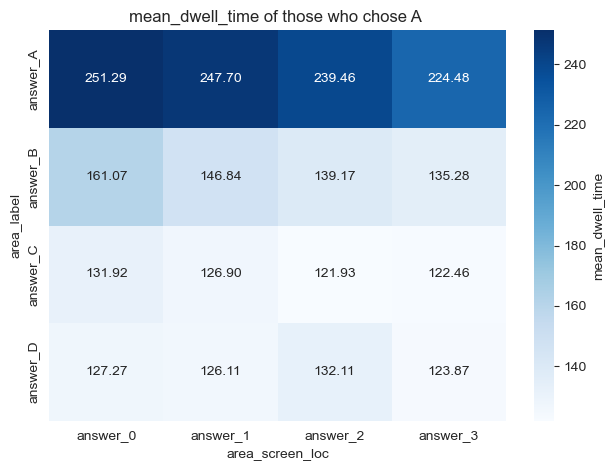

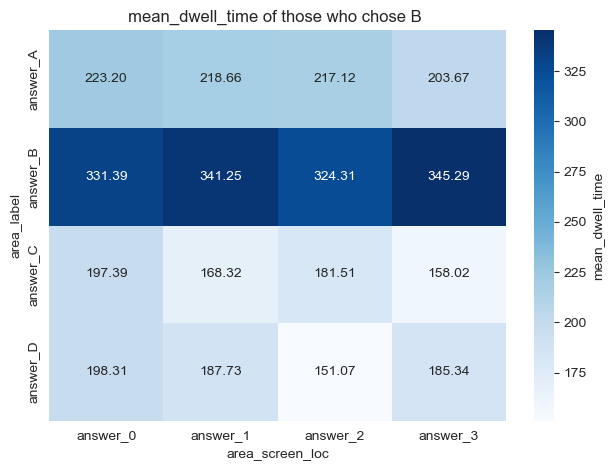

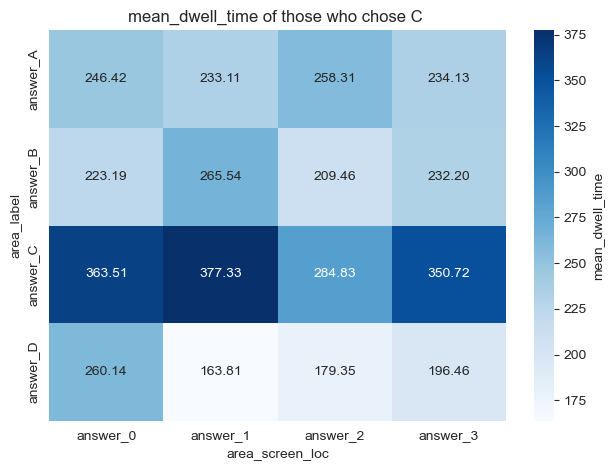

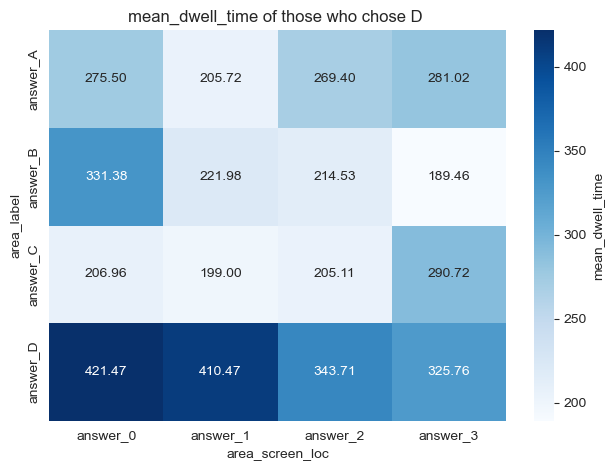

GATHERERS


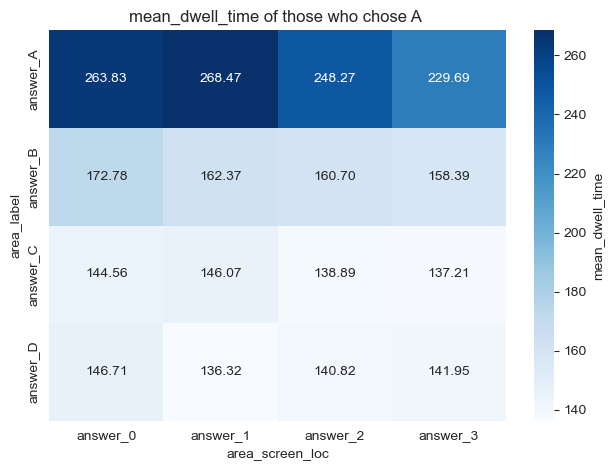

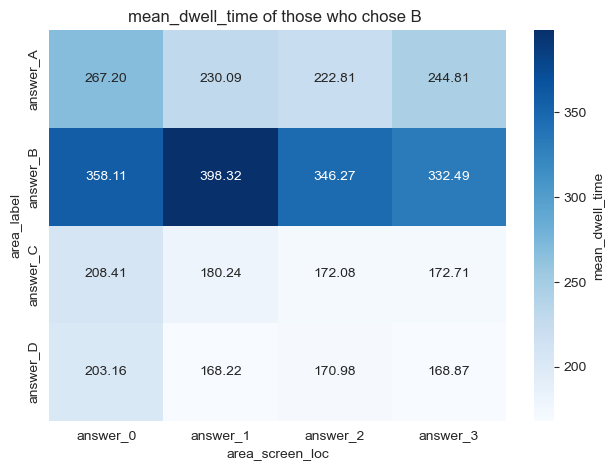

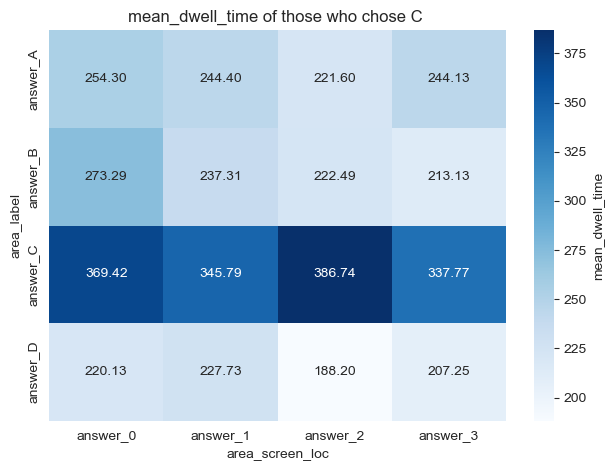

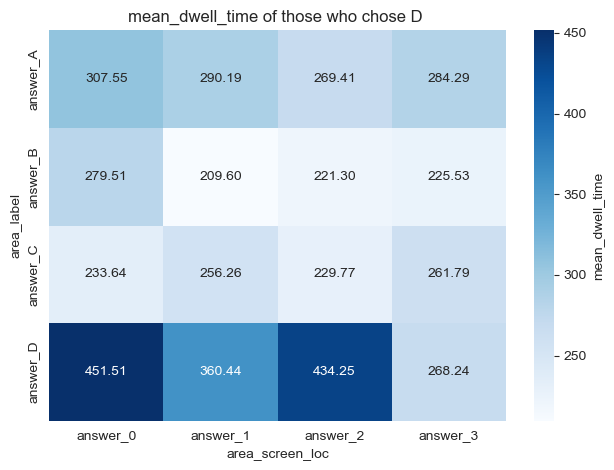

In [86]:
label_vs_loc_mat('mean_dwell_time', df_noq_h, df_noq_g)

### Basic Stats Boxplots

In [78]:
def boxplot_ABCD_avg(df, stat, selected='A', h_or_g='hunters'):
    df = df[['TRIAL_INDEX', 'participant_id', 'area_label', 'area_screen_loc', stat]].drop_duplicates().copy()

    df_avg = (
        df.groupby(['participant_id', 'area_label'])[stat]
        .sum()
        .reset_index()
    )

    plt.figure(figsize=(6, 6))
    sns.boxplot(
        data=df_avg,
        x='area_label',
        y=stat,
    )

    plt.title(f"{stat} distribution (averaged across screen locations) of those who chose {selected}")
    plt.xlabel('area_label')
    plt.ylabel(stat)
    plt.tight_layout()
    #plt.savefig(f"new_plots/basic_stats_boxplots/{h_or_g}_{stat}_{selected}.png")

    plt.show()


In [87]:
def label_vs_loc_box_sum(metric, dfh, dfg):
    print("HUNTERS")
    for ans in ['A', 'B', 'C', 'D']:
        boxplot_ABCD_avg(dfh[dfh['selected_answer_label'] == ans], metric, selected=ans, h_or_g='hunters')

    print("GATHERERS")
    for ans in ['A', 'B', 'C', 'D']:
        boxplot_ABCD_avg(dfg[dfg['selected_answer_label'] == ans], metric, selected=ans, h_or_g='gatherers')


HUNTERS


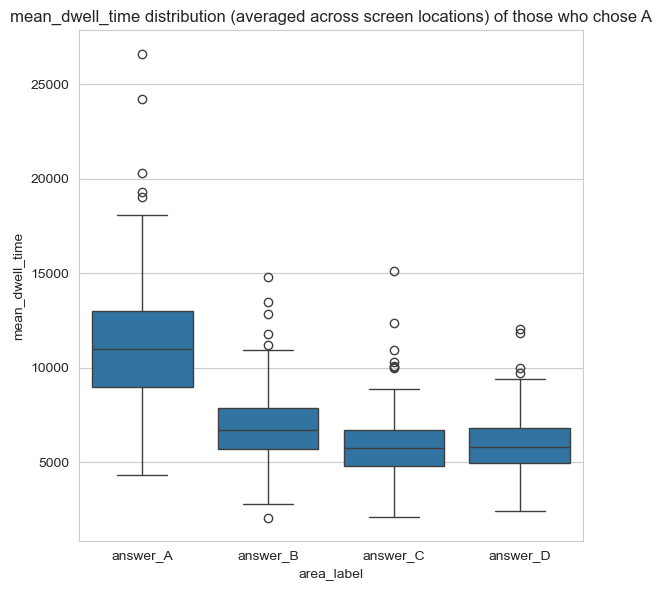

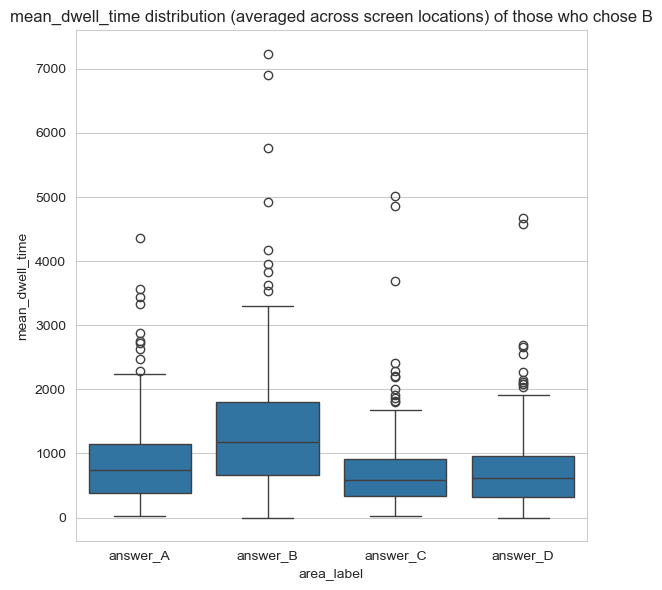

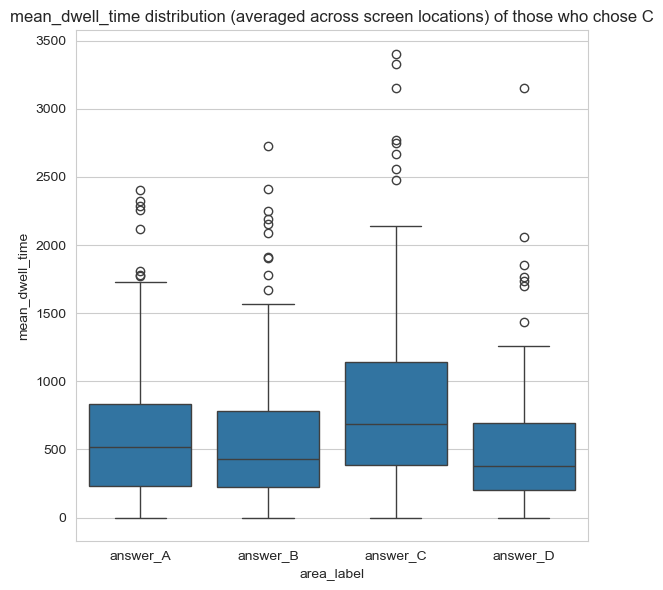

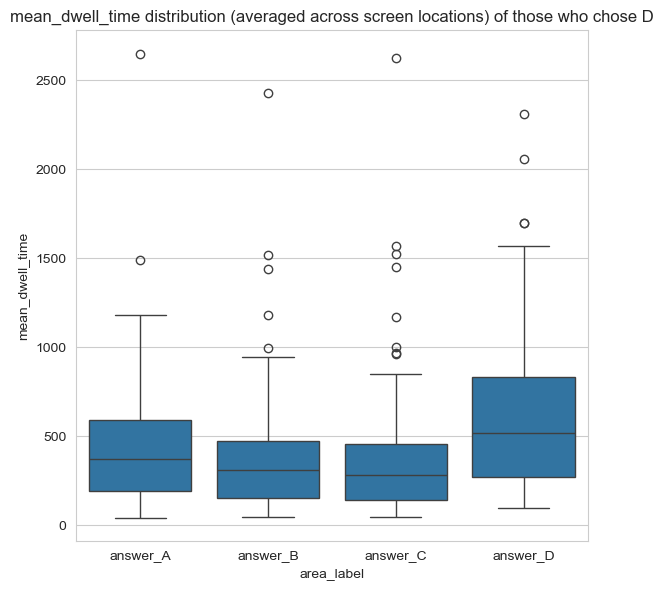

GATHERERS


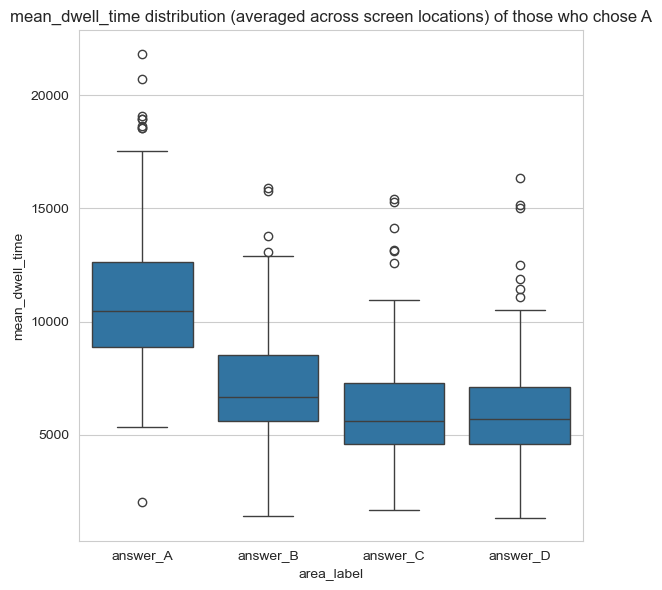

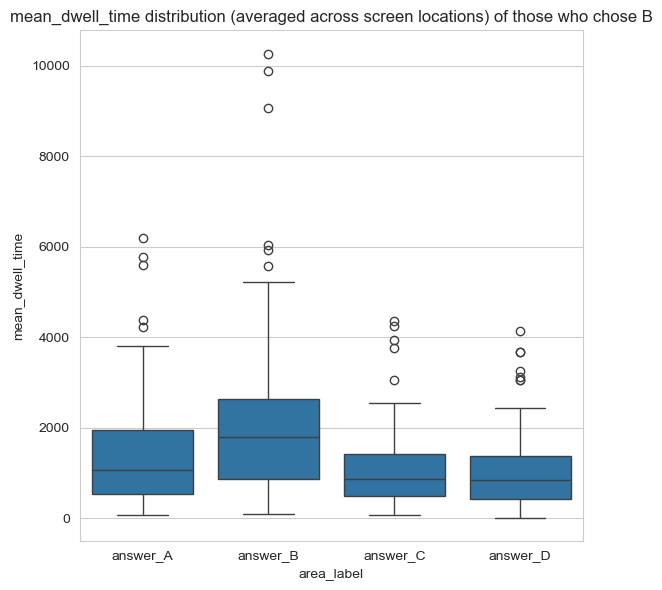

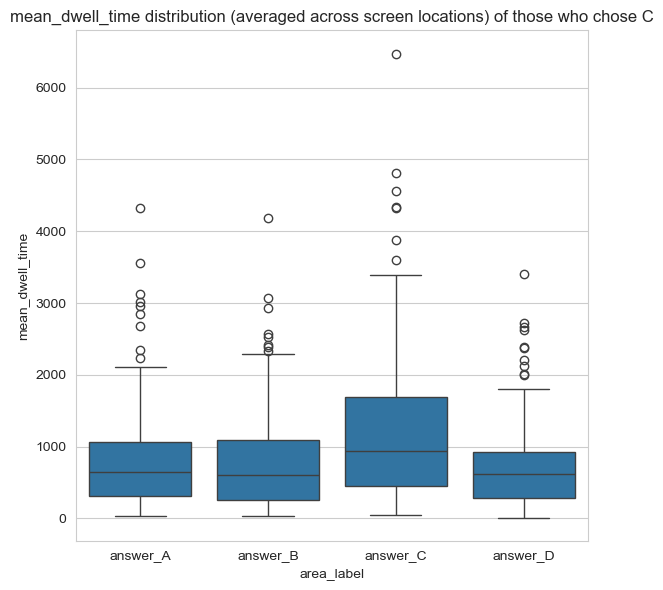

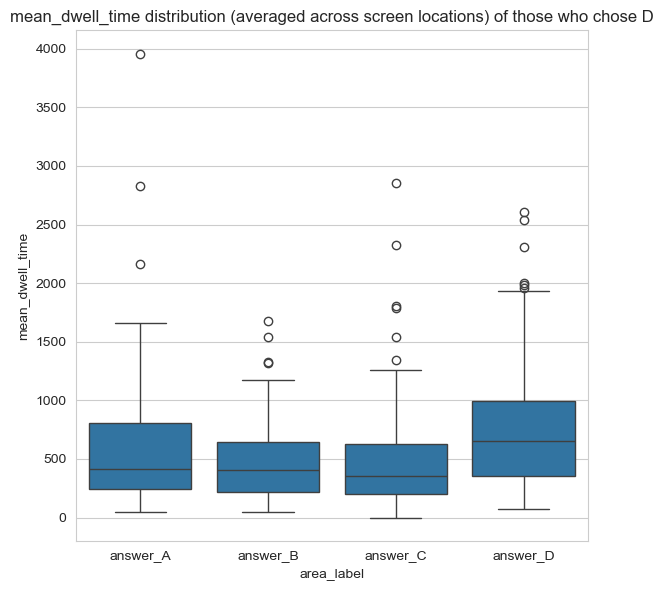

In [90]:
label_vs_loc_box_sum('mean_dwell_time', df_noq_h, df_noq_g)

### First / Last Visits Heatmaps

In [81]:
def matrix_plot_visits(df, stat, h_or_g = 'hunters', answ ='A', start_or_end = 'first'):
    df_selection = df[['TRIAL_INDEX', 'participant_id', stat]].drop_duplicates().copy()

    df_selection[stat] = df_selection[stat].apply(
        lambda x: ast.literal_eval(x) if isinstance(x, str) else x
    )

    df_selection['position'] = df_selection[stat].apply(lambda lst: list(range(len(lst))))

    df_exploded = df_selection.explode('position')
    df_exploded = df_exploded[df_exploded['position'].notna()]
    df_exploded['area'] = df_exploded.apply(
        lambda row: row[stat][int(row['position'])], axis=1
    )

    agg = df_exploded.groupby(['position', 'area']).size().reset_index(name='count')
    pivot_table = agg.pivot(index='position', columns='area', values='count').fillna(0)

    plt.figure(figsize=(8, 5))
    sns.heatmap(pivot_table, annot=True, fmt="g", cmap="viridis")
    plt.title(f"Frequency of Area Visits by {stat}")
    plt.xlabel("Area")
    plt.ylabel("Visit Order (position)")
    #plt.savefig(f"new_plots/{start_or_end}_visits/{stat}_{h_or_g}_{answ}.png")
    plt.show()

In [82]:
def plot_all_by_answer(matrix_plot_fn, dfh, dfg, with_questions=False, **kwargs):

    groups = {
        'hunters': dfh,
        'gatherers': dfg,
    }
    answers = ['A', 'B', 'C', 'D']
    starts = ['first', 'last']
    bases = ['visits_area_screen_loc', 'visits_area_label']
    suffix = "_with_q" if with_questions else ""

    sliced = {
        (g, a): df[df['selected_answer_label'] == a]
        for g, df in groups.items()
        for a in answers
    }

    for ans in answers:
        print(f'\nParticipants who answered {ans}:')
        print('--------------------------------------------------------------------------')
        for start in starts:
            print(f'####### {start.capitalize()} #######')
            for group in groups.keys():
                data = sliced[(group, ans)]
                for base in bases:
                    col = f'{start}_{base}{suffix}'
                    matrix_plot_fn(
                        data,
                        col,
                        h_or_g=group,
                        answ=ans,
                        start_or_end=start
                    )


In [91]:
plot_all_by_answer(
    matrix_plot_visits,
    df_noq_h,
    df_noq_g,
    with_questions=False,
)

### Dominant Strategies

In [92]:
def proportion_with_dominant_strategy(df, id_col = 'participant_id', strat_col = 'first_visits_area_screen_loc',threshold = 0.8):
    counts = df.groupby([id_col, strat_col]).size()
    total = counts.groupby(level=0).sum()
    top = counts.groupby(level=0).max()
    prop = top / total
    is_dominant = prop > threshold
    return is_dominant.mean()

In [93]:
threshold = 0.5
ph = proportion_with_dominant_strategy(df_with_features_h, strat_col = 'first_visits_area_screen_loc',threshold = threshold)
pg = proportion_with_dominant_strategy(df_with_features_g, strat_col = 'first_visits_area_screen_loc',threshold = threshold)

print(f"{ph:.1%} of hunter participants had a dominant strategy (>{threshold*100}% of trials).")
print(f"{pg:.1%} of gatherer participants had a dominant strategy (>{threshold*100}% of trials).")

56.7% of hunter participants had a dominant strategy (>50.0% of trials).
67.8% of gatherer participants had a dominant strategy (>50.0% of trials).


In [95]:
def plot_dominant_strategy_hist(df, id_col = 'participant_id', strat_col = 'first_visits_area_screen_loc',
                            bins = 20, figsize = (6, 4), h_or_g = 'h', save = True):

    counts = df.groupby([id_col, strat_col]).size()
    total = counts.groupby(level=0).sum()
    top   = counts.groupby(level=0).max()
    dominant_prop = top / total

    if isinstance(bins, int):
        bin_edges = np.linspace(0, 1, bins + 1)
    else:
        bin_edges = np.asarray(bins)

    plt.figure(figsize=figsize)
    plt.hist(dominant_prop, bins=bin_edges)
    plt.xlabel('Proportion of trials in dominant strategy')
    plt.ylabel('Number of participants')
    plt.title(f'Distribution of Dominant-Strategy Usage ({h_or_g})')
    ticks = bin_edges
    plt.xticks(ticks, [f"{int(x*100)}%" for x in ticks], rotation=45)
    plt.tight_layout()
    if save:
        plt.savefig(f"plots/strategies/dominant_prop_{strat_col}_{h_or_g}.png")
    plt.show()


    return dominant_prop

In [96]:
def plot_dominance_gap(df, id_col = 'participant_id', strat_col = 'first_visits_area_screen_loc',
                        bins = 20, figsize = (12, 5) , h_or_g = 'h', save = True,
                        hist_kwargs = None, scatter_kwargs = None):

    hist_kwargs   = hist_kwargs   or {'edgecolor':'k'}
    scatter_kwargs = scatter_kwargs or {'alpha':0.7}

    counts = df.groupby([id_col, strat_col]).size().unstack(fill_value=0)
    props = counts.div(counts.sum(axis=1), axis=0)

    p1 = props.max(axis=1)
    def second_largest(row):
        vals = row[row>0].nlargest(2)
        return vals.iloc[-1] if len(vals)>1 else 0
    p2 = props.apply(second_largest, axis=1)
    gap = p1 - p2

    result = pd.DataFrame({'p1': p1, 'p2': p2, 'gap': gap})

    fig, axes = plt.subplots(1, 2, figsize=figsize)

    axes[0].hist(gap, bins=bins, **hist_kwargs)
    axes[0].set_xlabel('Gap (P1 – P2)')
    axes[0].set_ylabel('Number of participants')
    axes[0].set_title(f'Histogram of Dominance Gaps ({h_or_g}) ')

    axes[1].scatter(p2, p1, **scatter_kwargs)
    axes[1].plot([0,1], [0,1], 'r--', label='P1=P2')
    axes[1].set_xlabel('2nd-most common proportion (P2)')
    axes[1].set_ylabel('Most common proportion (P1)')
    axes[1].set_title(f'P2 vs. P1 per Participant ({h_or_g})')
    axes[1].legend()

    plt.tight_layout()
    if save:
        plt.savefig(f"plots/strategies/dominance_gap_{strat_col}_{h_or_g}.png")
    plt.show()

    return result

In [97]:
def plot_strategy_count_distribution(df, id_col='participant_id', strat_col='first_visits_area_screen_loc',
                                     figsize=(6, 4), bins=None, h_or_g='h', save=True, **plot_kwargs):
    strat_counts = df.groupby(id_col)[strat_col].nunique()

    plt.figure(figsize=figsize)
    if bins is None:
        max_strat = strat_counts.max()
        bins = np.arange(0.5, max_strat + 1.5, 1.0)
    plt.hist(strat_counts, bins=bins, **plot_kwargs)
    plt.xlabel('Number of distinct strategies used')
    plt.ylabel('Number of participants')
    plt.title(f'Distribution of Strategy Counts ({h_or_g})')
    ticks = np.arange(1, strat_counts.max() + 1)
    plt.xticks(ticks)

    plt.tight_layout()
    if save:
        plt.savefig(f"plots/strategies/dom_str_counts_{strat_col}_{h_or_g}.png")

    plt.show()

    return strat_counts


def plot_dominant_strategy_counts_above_threshold(df, id_col='participant_id', strat_col='first_visits_area_screen_loc',
                                                  threshold=0.5, figsize=(8, 4), h_or_g='h', save=True, **bar_kwargs):
    counts = df.groupby([id_col, strat_col]).size().unstack(fill_value=0)
    props = counts.div(counts.sum(axis=1), axis=0)
    dominant_prop = props.max(axis=1)
    dominant_strat = props.idxmax(axis=1)
    mask = dominant_prop >= threshold
    filtered = dominant_strat[mask]
    freq = filtered.value_counts()
    freq = freq.sort_values(ascending=False)

    plt.figure(figsize=figsize)
    freq.plot(kind='bar', **bar_kwargs)
    plt.xlabel(strat_col)
    plt.ylabel('Number of participants')
    pct = int(threshold * 100)
    plt.title(f'Dominant Strategies (≥ {pct}% of trials) — Count of Participants ({h_or_g})')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    if save:
        plt.savefig(f"plots/strategies/str_above_thresh_{strat_col}_{h_or_g}.png")

    plt.show()

    return freq


In [98]:
def plot_dominant_strategy_counts_above_threshold(df, id_col = 'participant_id', strat_col = 'first_visits_area_screen_loc',
                                                threshold = 0.5, figsize = (8, 4), h_or_g = 'h', save = True, **bar_kwargs):

    counts = df.groupby([id_col, strat_col]).size().unstack(fill_value=0)
    props = counts.div(counts.sum(axis=1), axis=0)
    dominant_prop = props.max(axis=1)
    dominant_strat = props.idxmax(axis=1)
    mask = dominant_prop >= threshold
    filtered = dominant_strat[mask]
    freq = filtered.value_counts()
    freq = freq.sort_values(ascending=False)


    plt.figure(figsize=figsize)
    freq.plot(kind='bar', **bar_kwargs)
    plt.xlabel(strat_col)
    plt.ylabel('Number of participants')
    pct = int(threshold * 100)
    plt.title(f'Dominant Strategies (≥ {pct}% of trials) — Count of Participants ({h_or_g})')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    if save:
        plt.savefig(f"plots/strategies/str_above_thresh_{strat_col}_{h_or_g}.png")

    plt.show()

    return freq

In [99]:
def plot_strategies(df, id_col,strat_col, h_or_g = 'h', save = True):
    dominant = plot_dominant_strategy_hist(
        df,
        id_col=id_col,
        strat_col=strat_col,
        bins=20,
        figsize=(8,5),
        h_or_g = h_or_g,
        save = save
    )


    gaps = plot_dominance_gap(
        df,
        id_col=id_col,
        strat_col=strat_col,
        bins=20,
        figsize=(10,4),
        h_or_g = h_or_g,
        save = save
    )

    counts = plot_strategy_count_distribution(
        df,
        id_col=id_col,
        strat_col = strat_col,
        h_or_g = h_or_g,
        save = save
    )

    strategies = plot_dominant_strategy_counts_above_threshold(
        df,
        id_col=id_col,
        strat_col=strat_col,
        threshold=0.5,
        h_or_g = h_or_g,
        save = save
    )


    return dominant, gaps, counts,strategies

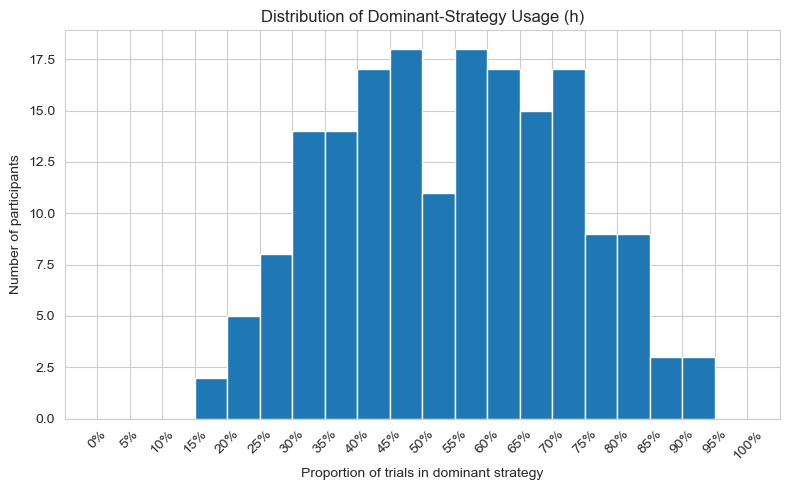

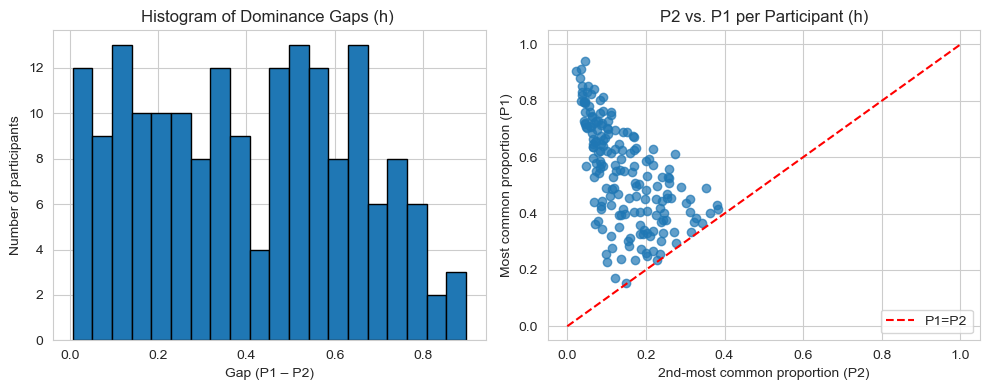

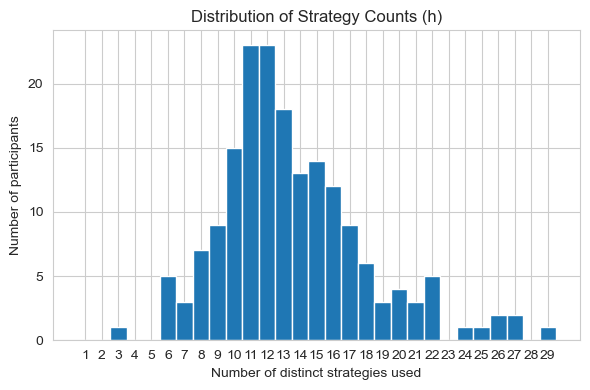

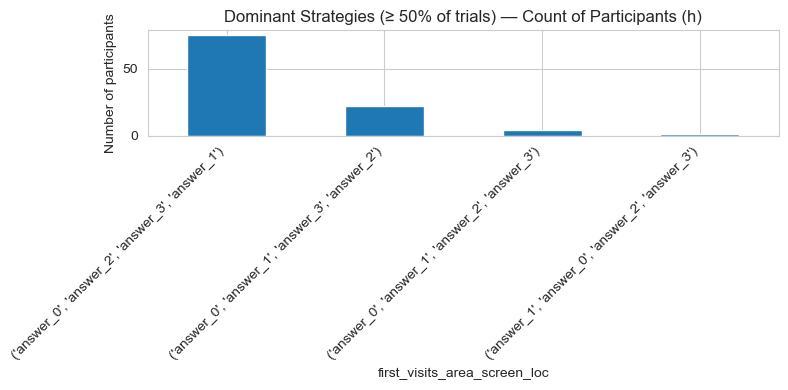

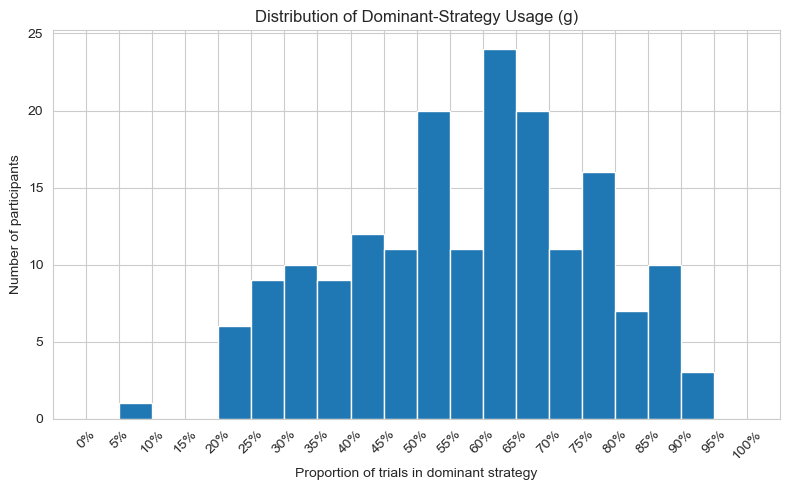

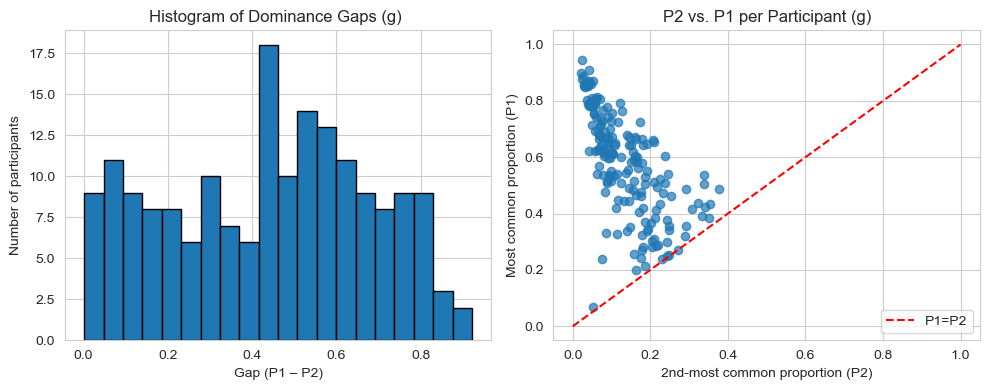

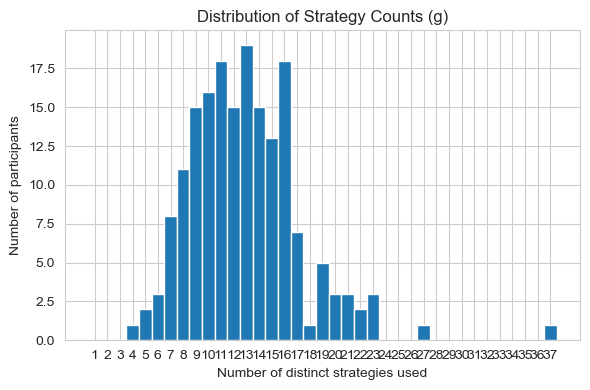

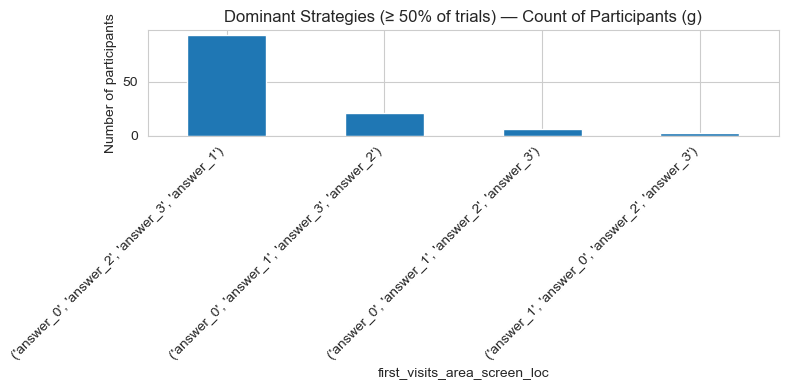

In [100]:
dh, gh, ch, sh = plot_strategies(df_with_features_h, id_col='participant_id',strat_col='first_visits_area_screen_loc', h_or_g='h',save=False)
dg, gg, cg, sg = plot_strategies(df_with_features_g, id_col='participant_id',strat_col='first_visits_area_screen_loc', h_or_g='g', save=False)